In [1]:
import numpy as np
import pandas as pd
from pylab import plt,mpl
import warnings
import datetime as dt

In [2]:
plt.style.use('seaborn')
warnings.simplefilter('ignore')
np.random.seed(1000)
mpl.rcParams['font.family']='serif'

# linear regression

In [3]:
raw=pd.read_csv('tr_eikon_eod_data.csv',index_col=0,parse_dates=True)
symbol='EUR='

In [4]:
data=pd.DataFrame(raw[symbol])
data

,EUR=
Date,
2010-01-01,1.4323
2010-01-04,1.4411
2010-01-05,1.4368
2010-01-06,1.4412
2010-01-07,1.4318
...,...
2018-06-25,1.1702
2018-06-26,1.1645
2018-06-27,1.1552


In [5]:
data['returns']=np.log(data[symbol]/data[symbol].shift(1))
data.dropna(inplace=True)
data['direction']=np.sign(data['returns']).astype(int)
data

,EUR=,returns,direction
Date,,,
2010-01-04,1.4411,0.006125,1
2010-01-05,1.4368,-0.002988,-1
2010-01-06,1.4412,0.003058,1
2010-01-07,1.4318,-0.006544,-1
2010-01-08,1.4412,0.006544,1
...,...,...,...
2018-06-25,1.1702,0.004024,1
2018-06-26,1.1645,-0.004883,-1
2018-06-27,1.1552,-0.008018,-1


In [6]:
data['direction'].value_counts()

 1    1111
-1    1093
 0      11
Name: direction, dtype: int64

<AxesSubplot:>

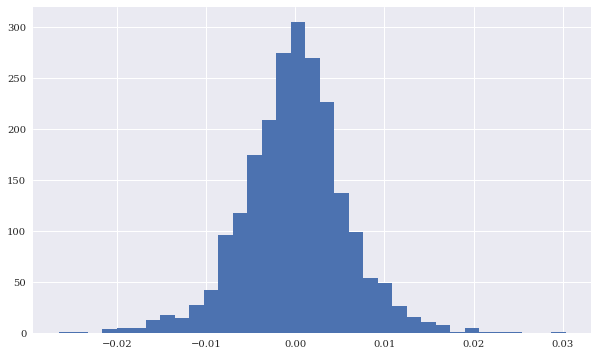

In [7]:
data.dropna(inplace=True)
data['returns'].astype(np.int64)
data['returns'].round(5).hist(bins=35,figsize=(10,6))
# data['returns'].show()

In [8]:
lags=2
def create_lag(data):
    global cols
    cols=[]
    for lag in range(1,lags+1):
        col='lag_{}'.format(lag)
        data[col]=data['returns'].shift(lag)
        cols.append(col)

In [9]:
create_lag(data)

In [10]:
data.head()
data[cols]

,lag_1,lag_2
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.006125,NaN
2010-01-06,-0.002988,0.006125
2010-01-07,0.003058,-0.002988
2010-01-08,-0.006544,0.003058
...,...,...
2018-06-25,0.004644,0.002676
2018-06-26,0.004024,0.004644
2018-06-27,-0.004883,0.004024


In [11]:
data.dropna(inplace=True)

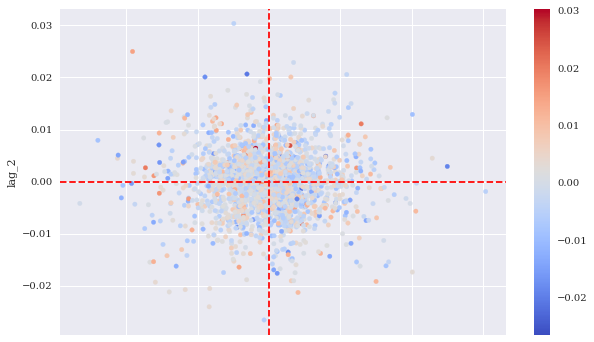

In [12]:
data.plot.scatter('lag_1','lag_2',c=data['returns'],cmap='coolwarm',figsize=(10,6),colorbar=True)
plt.axvline(0,c='r',ls='--')
plt.axhline(0,c='r',ls='--')

# regression

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model =LinearRegression()
data['pos_ols_1']=model.fit(data[cols],data['returns']).predict(data[cols])
data['pos_ols_2']=model.fit(data[cols],data['direction']).predict(data[cols])


In [15]:
data

,EUR=,returns,direction,lag_1,lag_2,pos_ols_1,pos_ols_2
Date,,,,,,,
2010-01-06,1.4412,0.003058,1,-0.002988,0.006125,-0.000002,-0.000663
2010-01-07,1.4318,-0.006544,-1,0.003058,-0.002988,-0.000164,0.001545
2010-01-08,1.4412,0.006544,1,-0.006544,0.003058,0.000030,0.032971
2010-01-11,1.4513,0.006984,1,0.006544,-0.006544,-0.000245,-0.004227
2010-01-12,1.4494,-0.001310,-1,0.006984,0.006544,-0.000154,-0.061068
...,...,...,...,...,...,...,...
2018-06-25,1.1702,0.004024,1,0.004644,0.002676,-0.000146,-0.031268
2018-06-26,1.1645,-0.004883,-1,0.004024,0.004644,-0.000122,-0.035783
2018-06-27,1.1552,-0.008018,-1,-0.004883,0.004024,0.000012,0.019191


In [16]:
data[['pos_ols_1','pos_ols_2']]=np.where(data[['pos_ols_1','pos_ols_2']]>0,1,-1)

In [17]:
data

,EUR=,returns,direction,lag_1,lag_2,pos_ols_1,pos_ols_2
Date,,,,,,,
2010-01-06,1.4412,0.003058,1,-0.002988,0.006125,-1,-1
2010-01-07,1.4318,-0.006544,-1,0.003058,-0.002988,-1,1
2010-01-08,1.4412,0.006544,1,-0.006544,0.003058,1,1
2010-01-11,1.4513,0.006984,1,0.006544,-0.006544,-1,-1
2010-01-12,1.4494,-0.001310,-1,0.006984,0.006544,-1,-1
...,...,...,...,...,...,...,...
2018-06-25,1.1702,0.004024,1,0.004644,0.002676,-1,-1
2018-06-26,1.1645,-0.004883,-1,0.004024,0.004644,-1,-1
2018-06-27,1.1552,-0.008018,-1,-0.004883,0.004024,1,1


In [18]:
data['pos_ols_1'].value_counts()

-1    1863
 1     350
Name: pos_ols_1, dtype: int64

In [19]:
data['pos_ols_2'].value_counts()

 1    1310
-1     903
Name: pos_ols_2, dtype: int64

In [20]:
pd.crosstab(data['pos_ols_1'],data['pos_ols_2'],rownames=['pos_ols_1'],colnames=['pos_ols_2'])

pos_ols_2,-1,1
pos_ols_1,,
-1,851,1012
1,52,298


In [21]:
(data['pos_ols_1'].diff() !=0).sum()

653

In [22]:
(data['pos_ols_2'].diff() !=0).sum()

766

In [23]:
(data['direction']==data['pos_ols_1']).mean()

0.48847718029823767

In [24]:
(data['direction']==data['pos_ols_2']).mean()

0.5173971983732489

<AxesSubplot:xlabel='Date'>

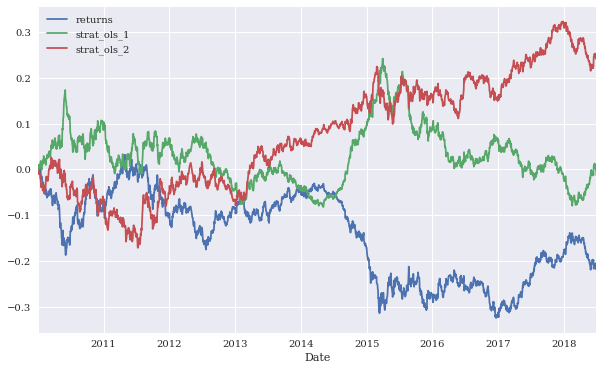

In [25]:
data['strat_ols_1']=data['pos_ols_1']*data['returns']
data['strat_ols_2']=data['pos_ols_2']*data['returns']
data[['returns','strat_ols_1','strat_ols_2']].cumsum().plot(figsize=(10,6))

<AxesSubplot:xlabel='Date'>

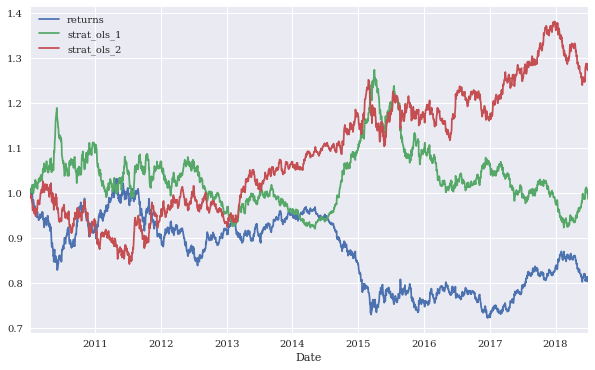

In [26]:
data[['returns','strat_ols_1','strat_ols_2']].cumsum().apply(np.exp).plot(figsize=(10,6))

# clustering  (kmeans)

In [27]:
from sklearn.cluster import KMeans

In [28]:
model=KMeans(n_clusters=2,random_state=0)

In [29]:
model.fit(data[cols])

KMeans(n_clusters=2, random_state=0)

In [30]:
data['pos_clus']=model.predict(data[cols])

In [31]:
data

,EUR=,returns,direction,lag_1,lag_2,pos_ols_1,pos_ols_2,strat_ols_1,strat_ols_2,pos_clus
Date,,,,,,,,,,
2010-01-06,1.4412,0.003058,1,-0.002988,0.006125,-1,-1,-0.003058,-0.003058,1
2010-01-07,1.4318,-0.006544,-1,0.003058,-0.002988,-1,1,0.006544,-0.006544,0
2010-01-08,1.4412,0.006544,1,-0.006544,0.003058,1,1,0.006544,0.006544,1
2010-01-11,1.4513,0.006984,1,0.006544,-0.006544,-1,-1,-0.006984,-0.006984,0
2010-01-12,1.4494,-0.001310,-1,0.006984,0.006544,-1,-1,0.001310,0.001310,0
...,...,...,...,...,...,...,...,...,...,...
2018-06-25,1.1702,0.004024,1,0.004644,0.002676,-1,-1,-0.004024,-0.004024,0
2018-06-26,1.1645,-0.004883,-1,0.004024,0.004644,-1,-1,0.004883,0.004883,1
2018-06-27,1.1552,-0.008018,-1,-0.004883,0.004024,1,1,-0.008018,-0.008018,1


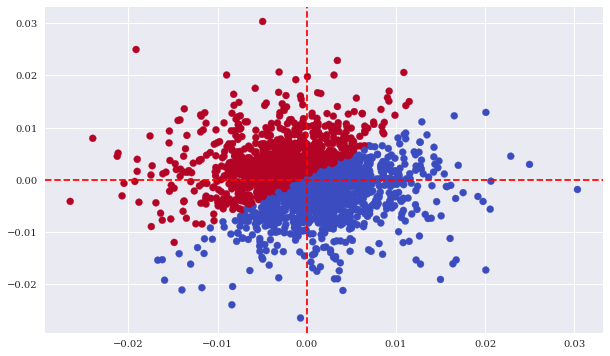

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(data[cols].iloc[:,0],data[cols].iloc[:,1],c=data['pos_clus'],cmap='coolwarm')
plt.axvline(0,c='red',ls='--')
plt.axhline(0,c='r',ls='--')

# classification AIgorithms

In [33]:
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [34]:
C=1

In [35]:
models={
    'log_reg':linear_model.LogisticRegression(C=C),
    'gauss_nb':GaussianNB(),
    'svm':SVC(C=C)
}

In [36]:
def fit_models(data):
    mfit={model:models[model].fit(data[cols_bin],data['direction'])for model in models.keys()}

In [37]:
def derive_positions(data):
    for model in models.keys():
        data['pos_'+model]=models[model].predict(data[cols_bin])

In [38]:
def create_bins(data, bins=[0]):
    global cols_bin
    cols_bin = []
    for col in cols:
        col_bin = col + '_bin'
        data[col_bin] = np.digitize(data[col], bins=bins)  
        cols_bin.append(col_bin)

In [39]:
create_bins(data)
cols_bin

['lag_1_bin', 'lag_2_bin']

In [40]:
fit_models(data)
derive_positions(data)

In [41]:
data

,EUR=,returns,direction,lag_1,lag_2,pos_ols_1,pos_ols_2,strat_ols_1,strat_ols_2,pos_clus,lag_1_bin,lag_2_bin,pos_log_reg,pos_gauss_nb,pos_svm
Date,,,,,,,,,,,,,,,
2010-01-06,1.4412,0.003058,1,-0.002988,0.006125,-1,-1,-0.003058,-0.003058,1,0,1,1,1,1
2010-01-07,1.4318,-0.006544,-1,0.003058,-0.002988,-1,1,0.006544,-0.006544,0,1,0,-1,-1,1
2010-01-08,1.4412,0.006544,1,-0.006544,0.003058,1,1,0.006544,0.006544,1,0,1,1,1,1
2010-01-11,1.4513,0.006984,1,0.006544,-0.006544,-1,-1,-0.006984,-0.006984,0,1,0,-1,-1,1
2010-01-12,1.4494,-0.001310,-1,0.006984,0.006544,-1,-1,0.001310,0.001310,0,1,1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,1.1702,0.004024,1,0.004644,0.002676,-1,-1,-0.004024,-0.004024,0,1,1,-1,-1,-1
2018-06-26,1.1645,-0.004883,-1,0.004024,0.004644,-1,-1,0.004883,0.004883,1,1,1,-1,-1,-1
2018-06-27,1.1552,-0.008018,-1,-0.004883,0.004024,1,1,-0.008018,-0.008018,1,0,1,1,1,1


In [42]:
def evaluate_strats(data):
    global sel
    sel=[]
    for model in models.keys():
        col='strat_'+model
        data[col]=data['pos_'+model]*data['returns']
        sel.append(col)
    sel.insert(0,'returns')

In [43]:
evaluate_strats(data)

In [44]:
sel

['returns', 'strat_log_reg', 'strat_gauss_nb', 'strat_svm']

In [45]:
data

,EUR=,returns,direction,lag_1,lag_2,pos_ols_1,pos_ols_2,strat_ols_1,strat_ols_2,pos_clus,lag_1_bin,lag_2_bin,pos_log_reg,pos_gauss_nb,pos_svm,strat_log_reg,strat_gauss_nb,strat_svm
Date,,,,,,,,,,,,,,,,,,
2010-01-06,1.4412,0.003058,1,-0.002988,0.006125,-1,-1,-0.003058,-0.003058,1,0,1,1,1,1,0.003058,0.003058,0.003058
2010-01-07,1.4318,-0.006544,-1,0.003058,-0.002988,-1,1,0.006544,-0.006544,0,1,0,-1,-1,1,0.006544,0.006544,-0.006544
2010-01-08,1.4412,0.006544,1,-0.006544,0.003058,1,1,0.006544,0.006544,1,0,1,1,1,1,0.006544,0.006544,0.006544
2010-01-11,1.4513,0.006984,1,0.006544,-0.006544,-1,-1,-0.006984,-0.006984,0,1,0,-1,-1,1,-0.006984,-0.006984,0.006984
2010-01-12,1.4494,-0.001310,-1,0.006984,0.006544,-1,-1,0.001310,0.001310,0,1,1,-1,-1,-1,0.001310,0.001310,0.001310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,1.1702,0.004024,1,0.004644,0.002676,-1,-1,-0.004024,-0.004024,0,1,1,-1,-1,-1,-0.004024,-0.004024,-0.004024
2018-06-26,1.1645,-0.004883,-1,0.004024,0.004644,-1,-1,0.004883,0.004883,1,1,1,-1,-1,-1,0.004883,0.004883,0.004883
2018-06-27,1.1552,-0.008018,-1,-0.004883,0.004024,1,1,-0.008018,-0.008018,1,0,1,1,1,1,-0.008018,-0.008018,-0.008018


In [46]:
data[sel].sum().apply(np.exp)

returns           0.813126
strat_log_reg     1.385460
strat_gauss_nb    1.385460
strat_svm         1.016673
dtype: float64

<AxesSubplot:xlabel='Date'>

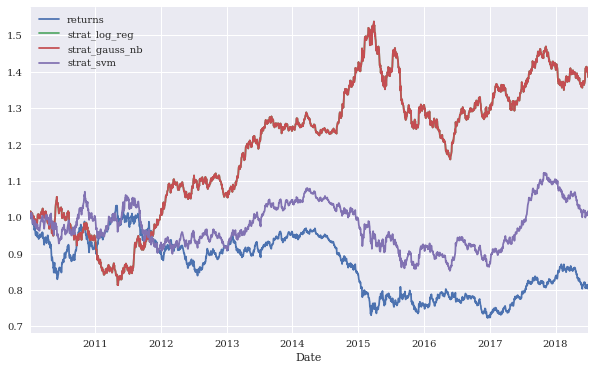

In [47]:
data[sel].cumsum().apply(np.exp).plot(figsize=(10,6))

# five binary features

In [48]:
data=pd.DataFrame(raw[symbol])
data

,EUR=
Date,
2010-01-01,1.4323
2010-01-04,1.4411
2010-01-05,1.4368
2010-01-06,1.4412
2010-01-07,1.4318
...,...
2018-06-25,1.1702
2018-06-26,1.1645
2018-06-27,1.1552


In [49]:
data['returns']=np.log(data/data.shift(1))
data['direction']=np.sign(data['returns'])
data

,EUR=,returns,direction
Date,,,
2010-01-01,1.4323,NaN,NaN
2010-01-04,1.4411,0.006125,1.0
2010-01-05,1.4368,-0.002988,-1.0
2010-01-06,1.4412,0.003058,1.0
2010-01-07,1.4318,-0.006544,-1.0
...,...,...,...
2018-06-25,1.1702,0.004024,1.0
2018-06-26,1.1645,-0.004883,-1.0
2018-06-27,1.1552,-0.008018,-1.0


In [51]:
lags=5
create_lag(data)
data.dropna(inplace=True)

In [52]:
data

,EUR=,returns,direction,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,,,
2010-01-11,1.4513,0.006984,1.0,0.006544,-0.006544,0.003058,-0.002988,0.006125
2010-01-12,1.4494,-0.001310,-1.0,0.006984,0.006544,-0.006544,0.003058,-0.002988
2010-01-13,1.4510,0.001103,1.0,-0.001310,0.006984,0.006544,-0.006544,0.003058
2010-01-14,1.4502,-0.000551,-1.0,0.001103,-0.001310,0.006984,0.006544,-0.006544
2010-01-15,1.4382,-0.008309,-1.0,-0.000551,0.001103,-0.001310,0.006984,0.006544
...,...,...,...,...,...,...,...,...
2018-06-25,1.1702,0.004024,1.0,0.004644,0.002676,-0.001555,-0.002930,0.001291
2018-06-26,1.1645,-0.004883,-1.0,0.004024,0.004644,0.002676,-0.001555,-0.002930
2018-06-27,1.1552,-0.008018,-1.0,-0.004883,0.004024,0.004644,0.002676,-0.001555


In [53]:
create_bins(data)
cols_bin

['lag_1_bin', 'lag_2_bin', 'lag_3_bin', 'lag_4_bin', 'lag_5_bin']

In [54]:
data.dropna(inplace=True)
fit_models(data)


In [57]:
derive_positions(data)
evaluate_strats(data)

In [58]:
data[sel].sum().apply(np.exp)

returns           0.810644
strat_log_reg     1.191997
strat_gauss_nb    1.191997
strat_svm         2.364393
dtype: float64

In [59]:
(data['direction']==data['pos_log_reg']).mean()

0.5149321266968325

In [60]:
(data['direction']==data['pos_gauss_nb']).mean()

0.5149321266968325

In [61]:
(data['direction']==data['pos_svm']).mean()

0.5447963800904977

<AxesSubplot:xlabel='Date'>

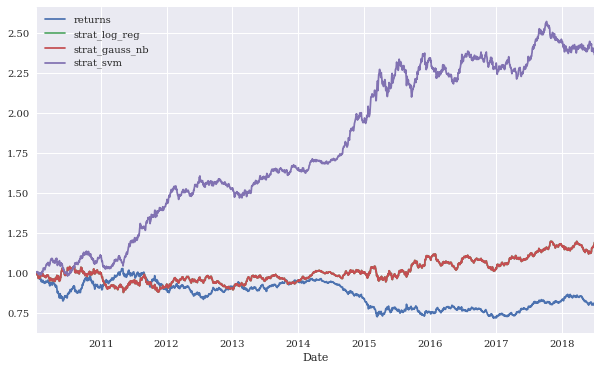

In [63]:
data[sel].cumsum().apply(np.exp).plot(figsize=(10,6))

# five digitized features 回归为1,2,3,0

In [64]:
mu=data['returns'].mean()
v=data['returns'].std()

In [65]:
bins=[mu-v,mu,mu+v]
bins

[-0.005924269398870448, -9.498932088272987e-05, 0.005734290757104988]

In [66]:
create_bins(data,bins)

In [67]:
data[cols_bin]

,lag_1_bin,lag_2_bin,lag_3_bin,lag_4_bin,lag_5_bin
Date,,,,,
2010-01-11,3,0,2,1,3
2010-01-12,3,3,0,2,1
2010-01-13,1,3,3,0,2
2010-01-14,2,1,3,3,0
2010-01-15,1,2,1,3,3
...,...,...,...,...,...
2018-06-25,2,2,1,1,2
2018-06-26,2,2,2,1,1
2018-06-27,1,2,2,2,1


In [68]:
fit_models(data)
derive_positions(data)
evaluate_strats(data)

In [69]:
data[sel].sum().apply(np.exp)

returns           0.810644
strat_log_reg     1.520599
strat_gauss_nb    1.437281
strat_svm         5.815787
dtype: float64

In [70]:
data.head()

,EUR=,returns,direction,lag_1,lag_2,lag_3,lag_4,lag_5,lag_1_bin,lag_2_bin,lag_3_bin,lag_4_bin,lag_5_bin,pos_log_reg,pos_gauss_nb,pos_svm,strat_log_reg,strat_gauss_nb,strat_svm
Date,,,,,,,,,,,,,,,,,,,
2010-01-11,1.4513,0.006984,1.0,0.006544,-0.006544,0.003058,-0.002988,0.006125,3,0,2,1,3,-1.0,-1.0,-1.0,-0.006984,-0.006984,-0.006984
2010-01-12,1.4494,-0.001310,-1.0,0.006984,0.006544,-0.006544,0.003058,-0.002988,3,3,0,2,1,-1.0,-1.0,-1.0,0.001310,0.001310,0.001310
2010-01-13,1.4510,0.001103,1.0,-0.001310,0.006984,0.006544,-0.006544,0.003058,1,3,3,0,2,-1.0,-1.0,1.0,-0.001103,-0.001103,0.001103
2010-01-14,1.4502,-0.000551,-1.0,0.001103,-0.001310,0.006984,0.006544,-0.006544,2,1,3,3,0,-1.0,-1.0,-1.0,0.000551,0.000551,0.000551
2010-01-15,1.4382,-0.008309,-1.0,-0.000551,0.001103,-0.001310,0.006984,0.006544,1,2,1,3,3,1.0,1.0,-1.0,-0.008309,-0.008309,0.008309


In [71]:
(data['direction']==data['pos_log_reg']).mean()

0.5221719457013575

In [72]:
(data['direction']==data['pos_gauss_nb']).mean()

0.5158371040723982

In [73]:
(data['direction']==data['pos_svm']).mean()

0.5868778280542987

<AxesSubplot:xlabel='Date'>

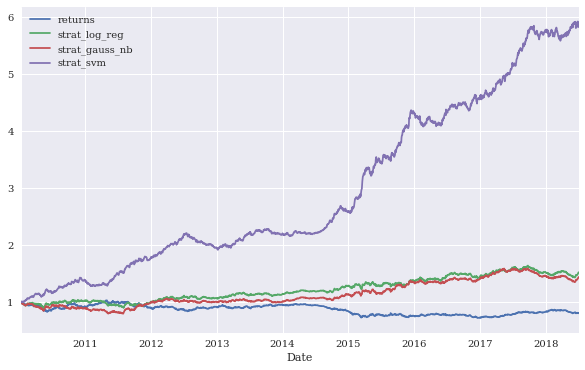

In [74]:
data[sel].cumsum().apply(np.exp).plot(figsize=(10,6))

# SequentialTrain-test split

In [75]:
len(data)

2210

In [79]:
split=int(len(data)*0.5)
split

1105

In [81]:
train=data.iloc[:split].copy()
test=data.iloc[split:].copy()

In [82]:
fit_models(train)
derive_positions(test)
evaluate_strats(test)

In [83]:
test[sel].sum().apply(np.exp)

returns           0.852649
strat_log_reg     1.077934
strat_gauss_nb    1.183389
strat_svm         1.023219
dtype: float64

In [84]:
(train['direction']==train['pos_log_reg']).mean()

0.5230769230769231

In [85]:
(test['direction']==test['pos_log_reg']).mean()

0.4986425339366516

# Randomized Train-test-split

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
train,test=train_test_split(data,test_size=0.5,shuffle=True,random_state=100)

In [88]:
data

,EUR=,returns,direction,lag_1,lag_2,lag_3,lag_4,lag_5,lag_1_bin,lag_2_bin,lag_3_bin,lag_4_bin,lag_5_bin,pos_log_reg,pos_gauss_nb,pos_svm,strat_log_reg,strat_gauss_nb,strat_svm
Date,,,,,,,,,,,,,,,,,,,
2010-01-11,1.4513,0.006984,1.0,0.006544,-0.006544,0.003058,-0.002988,0.006125,3,0,2,1,3,-1.0,-1.0,-1.0,-0.006984,-0.006984,-0.006984
2010-01-12,1.4494,-0.001310,-1.0,0.006984,0.006544,-0.006544,0.003058,-0.002988,3,3,0,2,1,-1.0,-1.0,-1.0,0.001310,0.001310,0.001310
2010-01-13,1.4510,0.001103,1.0,-0.001310,0.006984,0.006544,-0.006544,0.003058,1,3,3,0,2,-1.0,-1.0,1.0,-0.001103,-0.001103,0.001103
2010-01-14,1.4502,-0.000551,-1.0,0.001103,-0.001310,0.006984,0.006544,-0.006544,2,1,3,3,0,-1.0,-1.0,-1.0,0.000551,0.000551,0.000551
2010-01-15,1.4382,-0.008309,-1.0,-0.000551,0.001103,-0.001310,0.006984,0.006544,1,2,1,3,3,1.0,1.0,-1.0,-0.008309,-0.008309,0.008309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,1.1702,0.004024,1.0,0.004644,0.002676,-0.001555,-0.002930,0.001291,2,2,1,1,2,1.0,1.0,1.0,0.004024,0.004024,0.004024
2018-06-26,1.1645,-0.004883,-1.0,0.004024,0.004644,0.002676,-0.001555,-0.002930,2,2,2,1,1,-1.0,-1.0,-1.0,0.004883,0.004883,0.004883
2018-06-27,1.1552,-0.008018,-1.0,-0.004883,0.004024,0.004644,0.002676,-0.001555,1,2,2,2,1,-1.0,-1.0,1.0,0.008018,0.008018,-0.008018


In [89]:
train=train.copy().sort_index()
train[cols_bin].head()

,lag_1_bin,lag_2_bin,lag_3_bin,lag_4_bin,lag_5_bin
Date,,,,,
2010-01-11,3,0,2,1,3
2010-01-12,3,3,0,2,1
2010-01-13,1,3,3,0,2
2010-01-14,2,1,3,3,0
2010-01-18,0,1,2,1,3


In [90]:
test=test.copy().sort_index()
test[cols_bin].head()

,lag_1_bin,lag_2_bin,lag_3_bin,lag_4_bin,lag_5_bin
Date,,,,,
2010-01-15,1,2,1,3,3
2010-01-21,0,0,2,0,1
2010-01-22,1,0,0,2,0
2010-01-25,2,1,0,0,2
2010-01-27,1,2,2,1,0


In [91]:
fit_models(train)
derive_positions(test)
evaluate_strats(test)

In [92]:
test[sel].sum().apply(np.exp)

returns           0.736500
strat_log_reg     0.796591
strat_gauss_nb    1.010429
strat_svm         1.148902
dtype: float64

<AxesSubplot:xlabel='Date'>

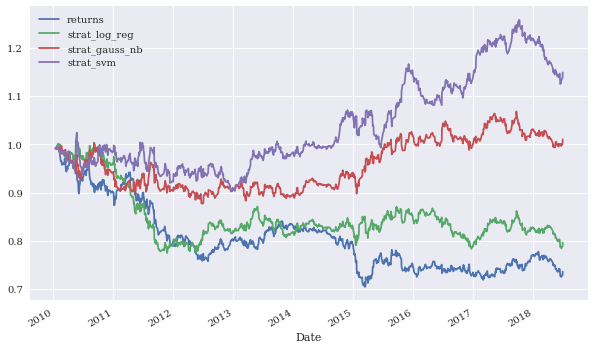

In [93]:
test[sel].cumsum().apply(np.exp).plot(figsize=(10,6))

# DNN with scikit-learn

In [94]:
from sklearn.neural_network import MLPClassifier

In [95]:
model=MLPClassifier(solver='lbfgs',alpha=1e-5, hidden_layer_sizes=2*[250],random_state=1)

In [96]:
%time model.fit(data[cols_bin],data['direction'])

Wall time: 7.44 s


MLPClassifier(alpha=1e-05, hidden_layer_sizes=[250, 250], random_state=1,
              solver='lbfgs')

In [97]:
data['pos_dnn_sk']=model.predict(data[cols_bin])

In [98]:
data['strat_dnn_sk']=data['pos_dnn_sk']*data['returns']

In [99]:
data[['returns','strat_dnn_sk']].sum().apply(np.exp)

returns          0.810644
strat_dnn_sk    35.273592
dtype: float64

In [101]:
(data['direction']==data['pos_dnn_sk']).mean()

0.6764705882352942

<AxesSubplot:xlabel='Date'>

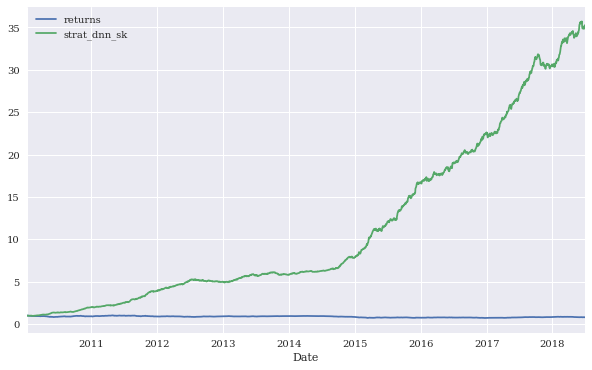

In [102]:
data[['returns','strat_dnn_sk']].cumsum().apply(np.exp).plot(figsize=(10,6))

In [103]:
train,test=train_test_split(data,test_size=0.5,random_state=100)

In [104]:
train=train.copy().sort_index()
train[cols_bin].head()

,lag_1_bin,lag_2_bin,lag_3_bin,lag_4_bin,lag_5_bin
Date,,,,,
2010-01-11,3,0,2,1,3
2010-01-12,3,3,0,2,1
2010-01-13,1,3,3,0,2
2010-01-14,2,1,3,3,0
2010-01-18,0,1,2,1,3


In [105]:
test=test.copy().sort_index()
test[cols_bin].head()

,lag_1_bin,lag_2_bin,lag_3_bin,lag_4_bin,lag_5_bin
Date,,,,,
2010-01-15,1,2,1,3,3
2010-01-21,0,0,2,0,1
2010-01-22,1,0,0,2,0
2010-01-25,2,1,0,0,2
2010-01-27,1,2,2,1,0


In [107]:
model=MLPClassifier(solver='lbfgs',alpha=1e-5,max_iter=500,hidden_layer_sizes=3*[500],random_state=1)

In [108]:
%time model.fit(train[cols_bin],train['direction'])

Wall time: 1min 22s


MLPClassifier(alpha=1e-05, hidden_layer_sizes=[500, 500, 500], max_iter=500,
              random_state=1, solver='lbfgs')

In [109]:
test['pos_dnn_sk']=model.predict(test[cols_bin])
test['strat_dnn_sk']=test['pos_dnn_sk']*test['returns']

In [110]:
test[['returns','strat_dnn_sk']].sum().apply(np.exp)

returns         0.736500
strat_dnn_sk    0.898304
dtype: float64

In [111]:
(train['direction']==train['pos_dnn_sk']).mean()

0.6660633484162896

In [112]:
(test['direction']==test['pos_dnn_sk']).mean()

0.5067873303167421

## 以上都是以sklearn为基础的实验，但没有做交叉验证，所以模型仅供参考